In [1]:
import pandas as pd
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

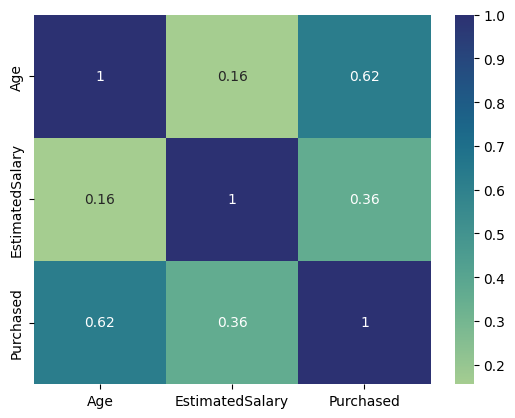

In [5]:
import seaborn as sns
correaltion_matrix=df.corr()
sns.heatmap(data=correaltion_matrix,cmap="crest",annot=True)

<Axes: >

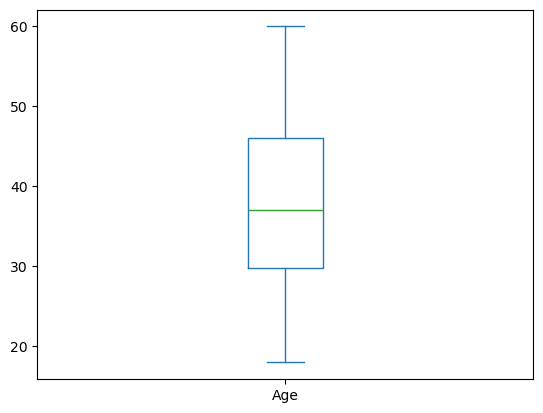

In [23]:
df['Age'].plot.box()

<Axes: >

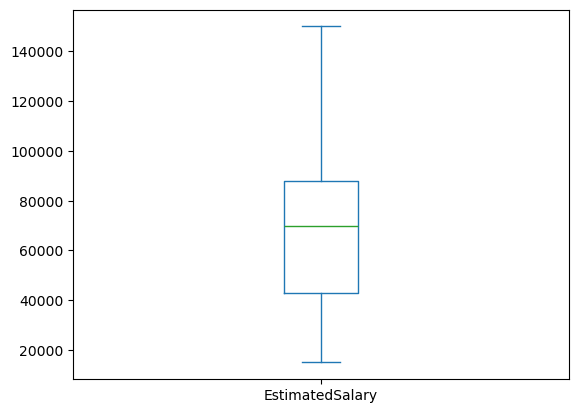

In [24]:
df['EstimatedSalary'].plot.box()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
x=df.loc[:,['Age','EstimatedSalary']].values
y=df['Purchased'].values

In [7]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


Splitting the data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
#Normalization using scalar transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [34]:
x_train

array([[ 0.40019617, -0.12806124],
       [ 1.55218513,  1.11813582],
       [-0.94379096, -0.41787451],
       [ 2.12817961,  0.39360265],
       [-0.46379556, -1.20037033],
       [ 0.11219893,  0.27767734],
       [-1.32778728, -1.08444502],
       [-0.2717974 , -0.64972512],
       [ 0.88019157, -1.34527697],
       [-0.7517928 ,  0.27767734],
       [ 0.20819801, -0.27296787],
       [-0.46379556, -0.76565043],
       [ 1.45618605,  2.13248226],
       [ 0.11219893,  0.16175203],
       [-1.03979004,  0.53850928],
       [ 0.20819801, -0.64972512],
       [-0.55979464,  1.90063164],
       [ 1.07218973,  0.53850928],
       [-0.17579832,  0.16175203],
       [-0.2717974 , -0.91055706],
       [-0.2717974 , -1.37425829],
       [ 0.88019157, -0.53379981],
       [-0.07979924, -0.41787451],
       [ 0.97619065, -1.0554637 ],
       [ 0.20819801,  0.04582672],
       [-0.55979464,  1.37896776],
       [ 2.03218053,  0.39360265],
       [-0.55979464, -1.4901836 ],
       [-0.65579372,

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1]


In [38]:
import numpy as np
#comparing acutal and predicted value side by side
y_comp=np.vstack((y_test,y_pred))
y_comp

array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [45]:
mse=mean_squared_error(y_test,y_pred)
mse

0.175

In [46]:
import numpy as np
rmse=np.sqrt(mse)
rmse

0.4183300132670378

In [47]:
r2_score=model.score(x_test,y_test)
r2_score

0.825

Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[48,  3],
       [11, 18]], dtype=int64)

In [40]:
print('TN',cm[0,0])
print('FP',cm[0,1])
print('FN',cm[1,0])
print('TP',cm[1,1])



TN 48
FP 3
FN 11
TP 18


In [61]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
print('The accuracy value : ', metrics.auc(fpr, tpr))

The accuracy value :  0.7809330628803245


In [62]:
from sklearn.metrics import average_precision_score
print('The Average Precision score: ',average_precision_score(y_test, y_pred) )

The Average Precision score:  0.6695197044334975


In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error :',mse)

The mean square error : 0.175
